In [1]:
import sys
from gears import PertData, GEARS
import scanpy as sc
from gears.utils import dataverse_download
from zipfile import ZipFile 
import json
import os
import sys
import time
import copy
from pathlib import Path
from typing import Iterable, List, Tuple, Dict, Union, Optional
import warnings

import torch
import numpy as np
import matplotlib

In [2]:
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')  
seed = 1

In [3]:
pert_data = PertData('/home/share/huadjyin/home/zhoumin3/zhoumin/benchmark_data/01A_total_re/03scgpt/') # specific saved folder
pert_data.load(data_path = '/home/share/huadjyin/home/zhoumin3/zhoumin/benchmark_data/01A_total_re/03scgpt/normanweissman2019') # load the processed data, the path is saved folder + dataset_name
pert_data.prepare_split(split = 'simulation', seed = seed)
pert_data.get_dataloader(batch_size =  24, test_batch_size = 24)

Found local copy...
These perturbations are not in the GO graph and their perturbation can thus not be predicted
['LYL1+IER5L' 'IER5L+ctrl' 'KIAA1804+ctrl']
Local copy of pyg dataset is detected. Loading...
Done!
Local copy of split is detected. Loading...
Simulation split test composition:
combo_seen0:9
combo_seen1:52
combo_seen2:18
unseen_single:27
Done!
Creating dataloaders....
Done!


here1


In [4]:
gears_model = GEARS(pert_data, device = device, 
                            weight_bias_track = False, 
                            proj_name = 'new_data', 
                            exp_name = f'norman_new_gears_{seed}')
gears_model.load_pretrained(f'/home/share/huadjyin/home/zhoumin3/zhoumin/model_benchmark/01_A_results/NormanWeissman2019/gears/split{seed}/')


In [5]:
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline
def use_svg_display(): 
    backend_inline.set_matplotlib_formats('svg')
use_svg_display()
#gears_model.plot_perturbation('FOSB+CEBPB')

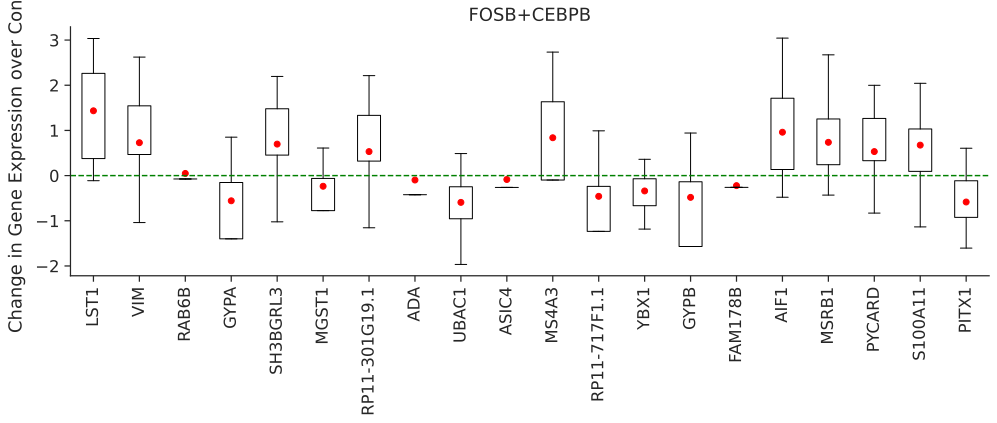

In [6]:
gears_model.plot_perturbation('FOSB+CEBPB')

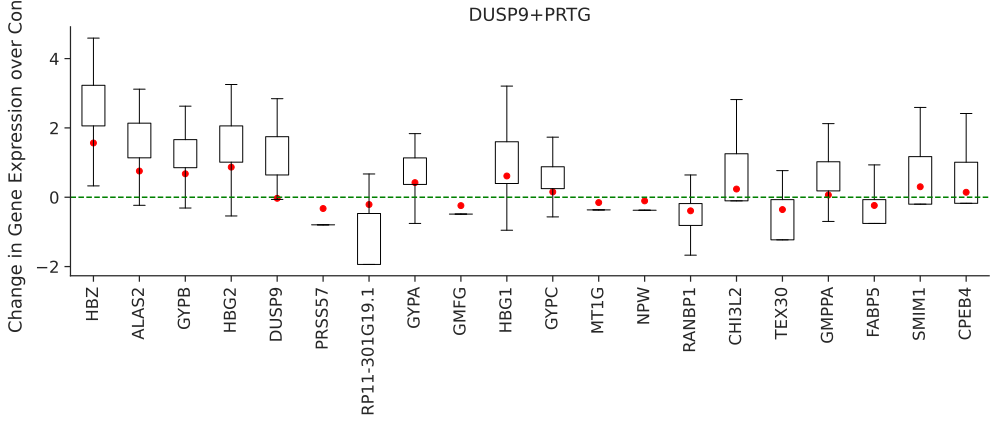

In [7]:
gears_model.plot_perturbation('DUSP9+PRTG')

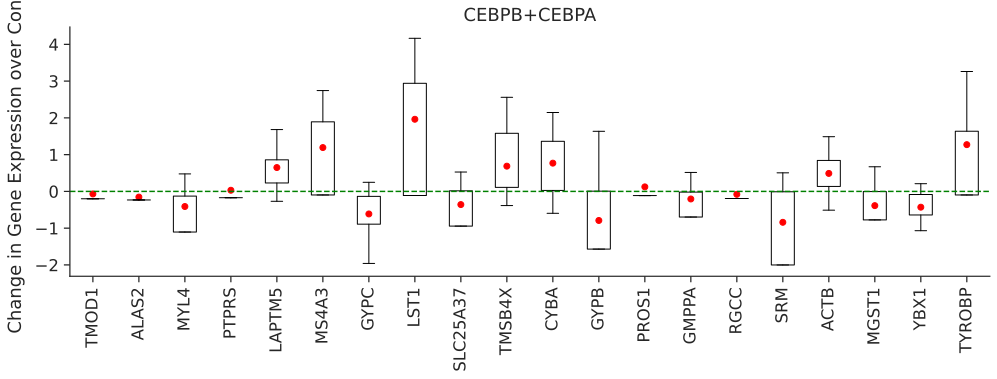

In [8]:
gears_model.plot_perturbation('CEBPB+CEBPA')

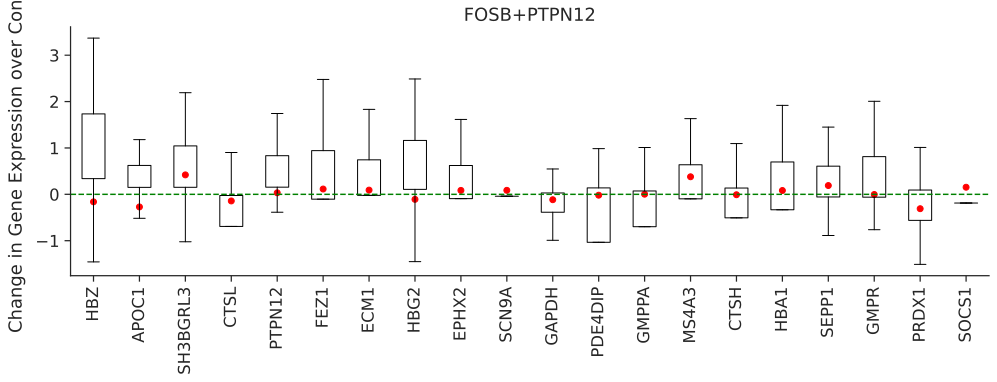

In [9]:
gears_model.plot_perturbation('FOSB+PTPN12')

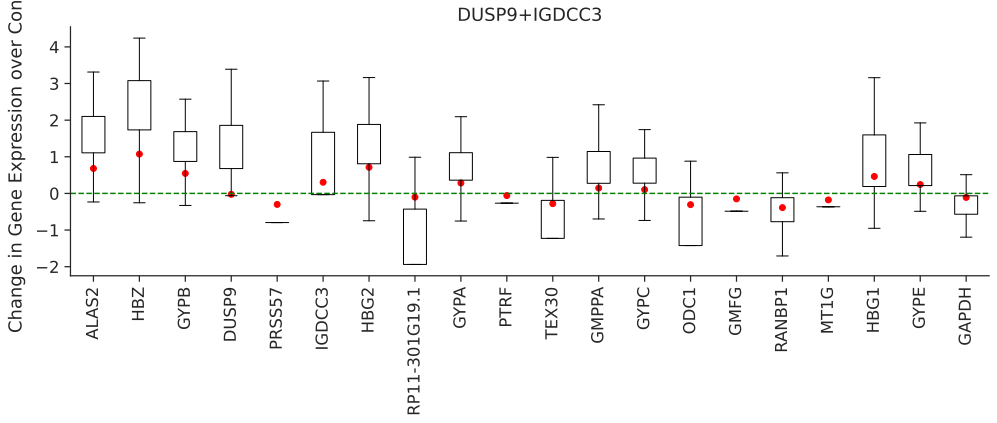

In [10]:
gears_model.plot_perturbation('DUSP9+IGDCC3')

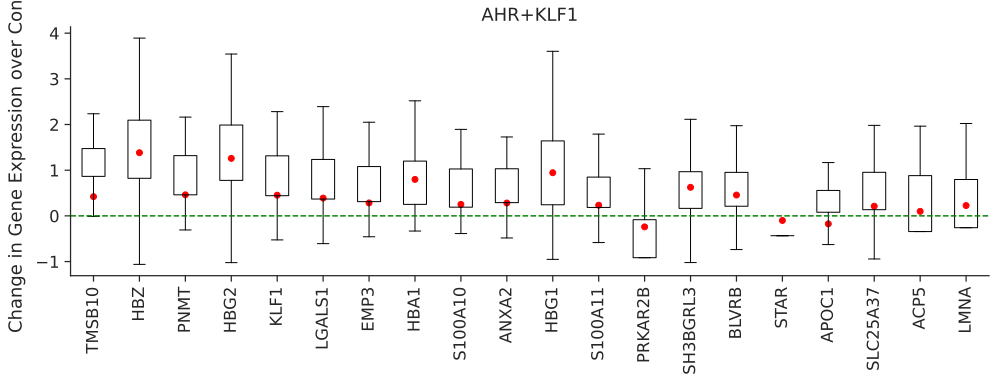

In [11]:
gears_model.plot_perturbation('AHR+KLF1')

In [9]:
gears_model.save_perturbation_truth_delta('DUSP9+PRTG')

{'Truth_delta': array([[ 2.9397063 ,  1.5028318 ,  1.341622  , ..., -0.7559759 ,
          0.6481606 ,  0.67285913],
        [ 0.952461  ,  2.0622294 ,  0.6549741 , ..., -0.7559759 ,
          0.32267058,  0.9431471 ],
        [ 2.0542922 ,  0.53517485,  1.050141  , ..., -0.7559759 ,
         -0.2002629 ,  1.8963528 ],
        ...,
        [ 2.2723866 ,  1.139255  ,  0.71722424, ..., -0.7559759 ,
          0.70512426, -0.17556435],
        [ 1.7061143 ,  1.181994  ,  1.1751646 , ..., -0.7559759 ,
         -0.2002629 , -0.17556435],
        [ 1.1021209 ,  1.0345174 ,  0.24044657, ..., -0.7559759 ,
          0.6224669 , -0.17556435]], dtype=float32),
 'Genes': ['HBZ',
  'ALAS2',
  'GYPB',
  'HBG2',
  'DUSP9',
  'PRSS57',
  'RP11-301G19.1',
  'GYPA',
  'GMFG',
  'HBG1',
  'GYPC',
  'MT1G',
  'NPW',
  'RANBP1',
  'CHI3L2',
  'TEX30',
  'GMPPA',
  'FABP5',
  'SMIM1',
  'CPEB4']}

In [14]:
gears_model.save_perturbation_truth_delta('CEBPB+CEBPA')

{'Truth_delta': array([[-2.00218022e-01, -2.33391196e-01,  9.40122604e-02,
         -1.72228232e-01,  3.17698658e-01,  1.63139129e+00,
         -2.29869246e-01, -1.12165578e-01, -7.25405812e-02,
         -2.09762573e-01, -9.13619995e-03, -1.23390913e-01,
         -1.13138758e-01, -3.16815436e-01, -1.93673953e-01,
         -1.19202614e-01,  1.74443722e-01,  6.69533134e-01,
         -8.94207954e-02, -9.74050462e-02],
        [-2.00218022e-01, -2.33391196e-01,  9.95738506e-02,
         -1.72228232e-01,  4.84576166e-01,  3.62380147e-01,
         -1.25325799e-01, -1.12165578e-01, -1.70234501e-01,
         -1.92933321e-01,  5.27185917e-01, -5.56677341e-01,
         -1.13138758e-01, -2.37696350e-01, -1.93673953e-01,
         -2.64953852e-01,  2.31883526e-01, -2.26926804e-03,
         -1.03646755e-01, -9.74050462e-02],
        [-2.00218022e-01,  3.42136949e-01,  9.90856886e-02,
         -1.72228232e-01,  5.70346713e-02, -9.75472480e-02,
         -5.44830918e-01, -1.12165578e-01, -3.68473589e-0

In [15]:
gears_model.save_perturbation_truth_delta('FOSB+PTPN12')

{'Truth_delta': array([[ 0.01572871,  0.41229773,  0.82213044, ...,  0.84565455,
          0.21734118, -0.18856288],
        [ 1.8563774 ,  0.9141362 ,  0.14507496, ...,  0.61170393,
          0.03174877, -0.18856288],
        [ 0.2741394 , -0.08504033,  0.42243993, ...,  0.4702515 ,
         -0.20194006, -0.18856288],
        ...,
        [ 1.3130381 , -0.21305466, -0.07121205, ...,  0.18866533,
         -0.14700699, -0.18856288],
        [ 2.665493  , -0.38197327, -1.0229867 , ..., -0.76310927,
         -0.62187386, -0.18856288],
        [-0.24830306,  0.465389  ,  0.21296406, ..., -0.16763943,
         -0.67338896, -0.18856288]], dtype=float32),
 'Genes': ['HBZ',
  'APOC1',
  'SH3BGRL3',
  'CTSL',
  'PTPN12',
  'FEZ1',
  'ECM1',
  'HBG2',
  'EPHX2',
  'SCN9A',
  'GAPDH',
  'PDE4DIP',
  'GMPPA',
  'MS4A3',
  'CTSH',
  'HBA1',
  'SEPP1',
  'GMPR',
  'PRDX1',
  'SOCS1']}

In [16]:
gears_model.save_perturbation_truth_delta('DUSP9+IGDCC3')

{'Truth_delta': array([[ 0.45047292, -1.3365564 ,  0.71685255, ...,  0.42041874,
          0.19497141, -0.16751242],
        [ 1.3501428 ,  1.7090611 ,  1.3959352 , ...,  0.41011083,
         -0.4888927 , -0.02680039],
        [ 0.8836819 ,  2.4611754 ,  0.75846684, ...,  0.45512044,
          0.21813187, -0.5292444 ],
        ...,
        [-0.2333912 , -0.2561661 ,  0.34864748, ..., -0.27518338,
          0.1878424 ,  0.25103188],
        [-0.2333912 ,  0.81461   ,  0.11225259, ...,  1.4641286 ,
          0.4101934 ,  0.07839227],
        [-0.2333912 ,  0.8773227 ,  0.9171275 , ..., -0.15270174,
         -0.4888927 , -0.6561878 ]], dtype=float32),
 'Genes': ['ALAS2',
  'HBZ',
  'GYPB',
  'DUSP9',
  'PRSS57',
  'IGDCC3',
  'HBG2',
  'RP11-301G19.1',
  'GYPA',
  'PTRF',
  'TEX30',
  'GMPPA',
  'GYPC',
  'ODC1',
  'GMFG',
  'RANBP1',
  'MT1G',
  'HBG1',
  'GYPE',
  'GAPDH']}

In [17]:
gears_model.save_perturbation_truth_delta('AHR+KLF1')

{'Truth_delta': array([[ 1.9507749 ,  0.5336499 ,  2.0684576 , ...,  0.18508309,
         -0.3436212 ,  0.61475843],
        [ 1.1517642 ,  1.9042122 ,  0.7042737 , ...,  1.2067316 ,
          0.11629108,  0.20119706],
        [-0.36297798, -2.0204206 , -0.30798337, ..., -0.94400173,
         -0.3436212 , -0.2587152 ],
        ...,
        [ 0.07301831,  0.01623058, -0.30798337, ..., -0.03530437,
         -0.3436212 , -0.2587152 ],
        [-1.1098917 , -0.09277272,  0.3745514 , ..., -0.94400173,
          0.74081594, -0.2587152 ],
        [ 0.05596566, -1.1227286 , -0.30798337, ..., -0.04630983,
         -0.3436212 , -0.2587152 ]], dtype=float32),
 'Genes': ['TMSB10',
  'HBZ',
  'PNMT',
  'HBG2',
  'KLF1',
  'LGALS1',
  'EMP3',
  'HBA1',
  'S100A10',
  'ANXA2',
  'HBG1',
  'S100A11',
  'PRKAR2B',
  'SH3BGRL3',
  'BLVRB',
  'STAR',
  'APOC1',
  'SLC25A37',
  'ACP5',
  'LMNA']}